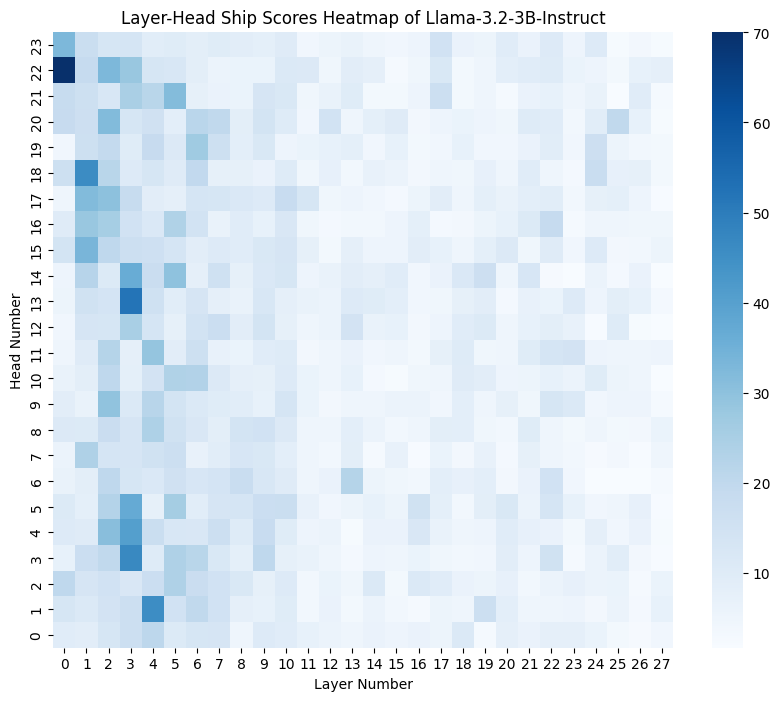

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data ={
  "0-0": 0.6933333333333334,
  "0-1": 0.7166666666666667,
  "0-2": 0.6983333333333333,
  "0-3": 0.7616666666666667,
  "0-4": 0.6916666666666667,
  "0-5": 0.7150000000000001,
  "0-6": 0.6916666666666667,
  "0-7": 0.6783333333333333,
  "0-8": 0.6933333333333334,
  "0-9": 0.7333333333333334,
  "0-10": 0.7150000000000001,
  "0-11": 0.71,
  "0-12": 0.7083333333333333,
  "0-13": 0.7133333333333334,
  "0-14": 0.7066666666666667,
  "0-15": 0.7050000000000001,
  "0-16": 0.6950000000000001,
  "0-17": 0.7233333333333334,
  "0-18": 0.7283333333333333,
  "0-19": 0.6950000000000001,
  "0-20": 0.7050000000000001,
  "0-21": 0.7016666666666667,
  "0-22": 0.7233333333333334,
  "0-23": 0.7216666666666667,
  "0-24": 0.72,
  "0-25": 0.7150000000000001,
  "0-26": 0.6983333333333333,
  "0-27": 0.7183333333333333,
  "0-28": 0.6950000000000001,
  "0-29": 0.6766666666666667,
  "0-30": 0.6983333333333333,
  "0-31": 0.7266666666666667,
  "1-0": 0.7116666666666667,
  "1-1": 0.6883333333333334,
  "1-2": 0.7366666666666667,
  "1-3": 0.6866666666666666,
  "1-4": 0.7133333333333334,
  "1-5": 0.7150000000000001,
  "1-6": 0.6783333333333333,
  "1-7": 0.7083333333333333,
  "1-8": 0.6883333333333334,
  "1-9": 0.7316666666666667,
  "1-10": 0.71,
  "1-11": 0.6983333333333333,
  "1-12": 0.7050000000000001,
  "1-13": 0.6950000000000001,
  "1-14": 0.7066666666666667,
  "1-15": 0.6966666666666667,
  "1-16": 0.7133333333333334,
  "1-17": 0.7,
  "1-18": 0.7333333333333334,
  "1-19": 0.7066666666666667,
  "1-20": 0.7050000000000001,
  "1-21": 0.7233333333333334,
  "1-22": 0.7583333333333333,
  "1-23": 0.6866666666666666,
  "1-24": 0.6916666666666667,
  "1-25": 0.7033333333333334,
  "1-26": 0.755,
  "1-27": 0.7,
  "1-28": 0.7016666666666667,
  "1-29": 0.7050000000000001,
  "1-30": 0.7183333333333333,
  "1-31": 0.7433333333333334,
  "2-0": 0.71,
  "2-1": 0.71,
  "2-2": 0.7150000000000001,
  "2-3": 0.7266666666666667,
  "2-4": 0.7566666666666666,
  "2-5": 0.7150000000000001,
  "2-6": 0.7116666666666667,
  "2-7": 0.7066666666666667,
  "2-8": 0.72,
  "2-9": 0.7133333333333334,
  "2-10": 0.7,
  "2-11": 0.72,
  "2-12": 0.7333333333333334,
  "2-13": 0.71,
  "2-14": 0.7116666666666667,
  "2-15": 0.7116666666666667,
  "2-16": 0.6933333333333334,
  "2-17": 0.7316666666666667,
  "2-18": 0.6950000000000001,
  "2-19": 0.7083333333333333,
  "2-20": 0.6733333333333333,
  "2-21": 0.7133333333333334,
  "2-22": 0.7083333333333333,
  "2-23": 0.7116666666666667,
  "2-24": 0.7150000000000001,
  "2-25": 0.73,
  "2-26": 0.7116666666666667,
  "2-27": 0.7233333333333334,
  "2-28": 0.7183333333333333,
  "2-29": 0.7083333333333333,
  "2-30": 0.7183333333333333,
  "2-31": 0.7383333333333333
}
def plot_layer_head_heatmap(data):
        data = json.load(f)


        layer_head_scores = {}
        max_layer = 0
        max_head = 0

        for key, value in data.items():
            layer, head = map(int, key.split('-'))
            layer_head_scores[(layer, head)] = value
            max_layer = max(max_layer, layer)
            max_head = max(max_head, head)
        score_matrix = np.zeros((max_head + 1, max_layer + 1))

        for (layer, head), score in layer_head_scores.items():
            score_matrix[head, layer] = score
        score_matrix = np.flipud(score_matrix)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            score_matrix, 
            annot=False, 
            cmap="Blues", 
            xticklabels=[f"{i}" for i in range(max_layer + 1)],
            yticklabels=[f"{i}" for i in range(max_head, -1, -1)]
        )
        plt.xlabel("Layer Number")
        plt.ylabel("Head Number")
        plt.title(f"Layer-Head Ship Scores Heatmap of {model_name}")
        plt.show(f"Layer-Head Ship Scores Heatmap of {model_name},lang = {lang}")
        plt.savefig()
    plot_layer_head_heatmap(data)


In [5]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_layer_head_heatmap(folder_path):
    """
    Process all JSON files in the specified folder structure, extract layer-head scores,
    and generate heatmaps for each JSON file. Include model folder name in titles and file names.

    Parameters:
    folder_path (str): The path to the folder containing subdirectories with JSON files.
    """
    # Iterate through subdirectories and files
    for root, dirs, files in os.walk(folder_path):
        # Extract model name from the folder structure
        model_name = os.path.basename(root)

        for file in files:
            if file.endswith(".jsonl"):
                file_path = os.path.join(root, file)

                # Read the JSON data
                with open(file_path, 'r') as f:
                    data = json.load(f)

                # Extract language from file name
                lang = file.split('_')[1]

                # Process layer-head scores
                layer_head_scores = {}
                max_layer = 0
                max_head = 0

                for key, value in data.items():
                    layer, head = map(int, key.split('-'))
                    layer_head_scores[(layer, head)] = value
                    max_layer = max(max_layer, layer)
                    max_head = max(max_head, head)

                # Create a matrix to hold scores
                score_matrix = np.zeros((max_head + 1, max_layer + 1))

                for (layer, head), score in layer_head_scores.items():
                    score_matrix[head, layer] = score

                # Flip matrix for better visualization
                score_matrix = np.flipud(score_matrix)

                # Generate heatmap
                plt.figure(figsize=(10, 8))
                sns.heatmap(
                    score_matrix,
                    annot=False,
                    cmap="Blues",
                    xticklabels=[f"{i}" for i in range(max_layer + 1)],
                    yticklabels=[f"{i}" for i in range(max_head, -1, -1)]
                )
                plt.xlabel("Layer Number")
                plt.ylabel("Head Number")
                plt.title(f"Layer-Head Scores Heatmap - {model_name} ({lang})")

                # Save heatmap as an image file
                output_file = f"heatmap_{model_name}_{lang}.png"
                output_path = os.path.join(root, output_file)
                plt.savefig(output_path)
                plt.close()

# Call the function with the path to the directory
plot_layer_head_heatmap('./Result_modified')
plot_layer_head_heatmap('./Result')
plot_layer_head_heatmap('./result of modified bug')


FileNotFoundError: [Errno 2] No such file or directory: '/home/tell/devenv/AI_Scientists/Multilingual-Safety-Head/ASR_head_detect/ASR by Removed Layer Indices Llama-3.1-8B-Instruct (de).png'

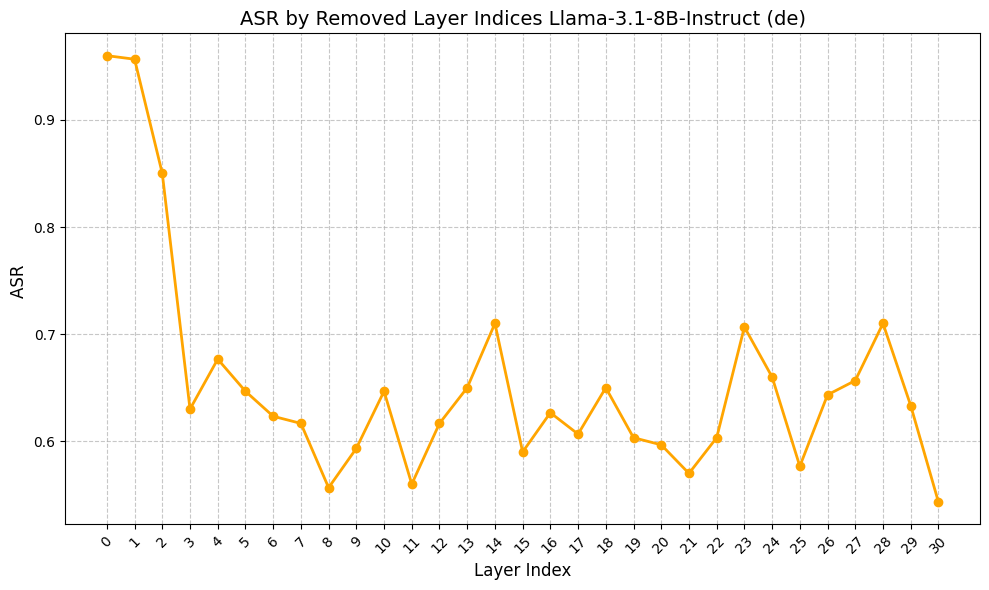

In [3]:

import matplotlib.pyplot as plt

# データを辞書形式で定義
# data = {
#     0: 0.0000, 1: 0.0000, 2: 0.2700, 3: 0.2767, 4: 0.2833, 5: 0.3833, 6: 0.3267, 7: 0.3867, 8: 0.3067, 9: 0.5067,
#     10: 0.4933, 11: 0.5133, 12: 0.4033, 13: 0.4867, 14: 0.3367, 15: 0.2100, 16: 0.2767, 17: 0.3000, 18: 0.3333,
#     19: 0.4067, 20: 0.1300, 21: 0.3333, 22: 0.2300, 23: 0.3133, 24: 0.4300, 25: 0.3567, 26: 0.3267, 27: 0.2767,
#     28: 0.3533, 29: 0.2967, 30: 0.2967, 31: 0.0033
# }
# data = {
#     0: 0.0000, 1: 0.0000, 2: 0.2700, 3: 0.2767, 4: 0.2833, 5: 0.3833, 6: 0.3267, 7: 0.3867, 8: 0.3067, 9: 0.5067,
#     10: 0.4933, 11: 0.5133, 12: 0.4033, 13: 0.4867, 14: 0.3367, 15: 0.2100, 16: 0.2767, 17: 0.3000, 18: 0.3333,
#     19: 0.4067, 20: 0.1300, 21: 0.3333, 22: 0.2300, 23: 0.3133, 24: 0.4300, 25: 0.3567, 26: 0.3267, 27: 0.2767}

data = {
    0: 0.96,
    1: 0.9566666666666667,
    2: 0.85,
    3: 0.63,
    4: 0.6766666666666667,
    5: 0.6466666666666667,
    6: 0.6233333333333333,
    7: 0.6166666666666667,
    8: 0.5566666666666666,
    9: 0.5933333333333333,
    10: 0.6466666666666667,
    11: 0.56,
    12: 0.6166666666666667,
    13: 0.65,
    14: 0.71,
    15: 0.5900000000000001,
    16: 0.6266666666666667,
    17: 0.6066666666666667,
    18: 0.65,
    19: 0.6033333333333333,
    20: 0.5966666666666667,
    21: 0.5700000000000001,
    22: 0.6033333333333333,
    23: 0.7066666666666667,
    24: 0.6599999999999999,
    25: 0.5766666666666667,
    26: 0.6433333333333333,
    27: 0.6566666666666667,
    28: 0.71,
    29: 0.6333333333333333,
    30: 0.5433333333333333
}

# x軸とy軸のデータ
layers = list(data.keys())
asr_values = list(data.values())

# 攻撃拒否率を計算（1 - ASR）
rejection_rates = [value for value in asr_values]

# グラフを作成
plt.figure(figsize=(10, 6))
plt.plot(layers, rejection_rates, marker='o', linestyle='-', linewidth=2, color='orange')

# グラフのタイトルと軸ラベル
plt.title("ASR by Removed Layer Indices Llama-3.1-8B-Instruct (de)", fontsize=14)
plt.xlabel("Layer Index", fontsize=12)
plt.ylabel("ASR ", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(layers, rotation=45, fontsize=10)
plt.tight_layout()
plt.savefig("./ASR_head_detect/ASR by Removed Layer Indices Llama-3.1-8B-Instruct (de).png")
# グラフを表示

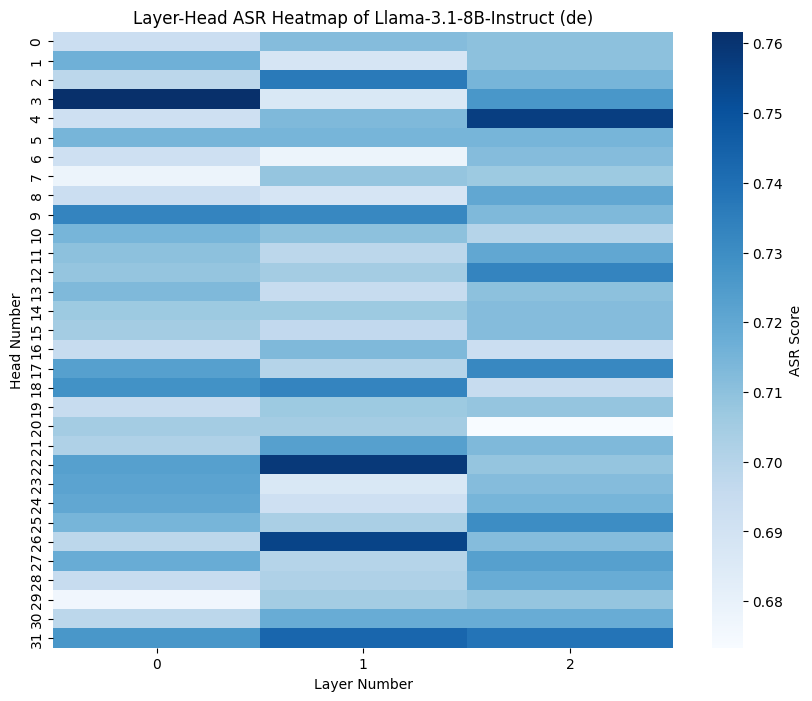

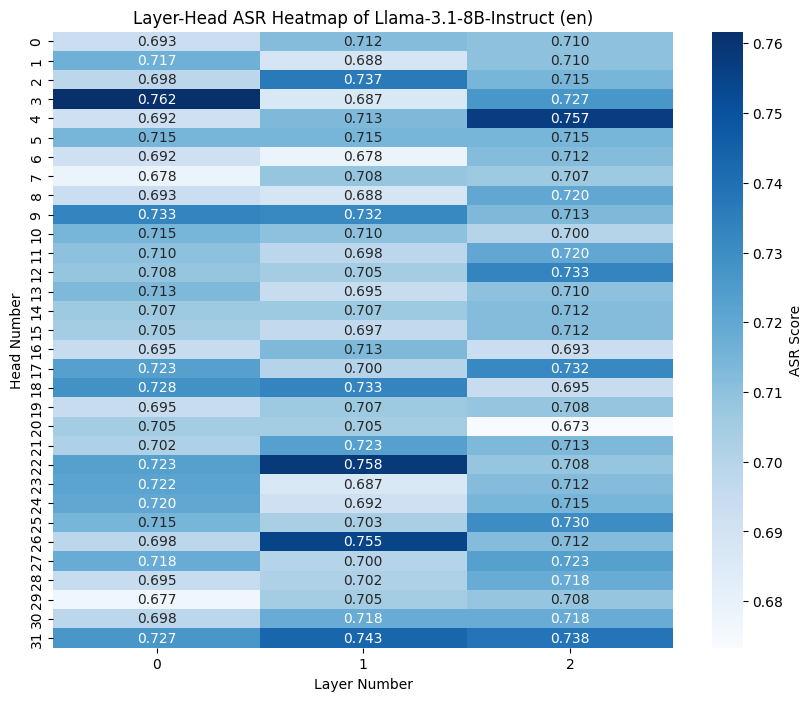

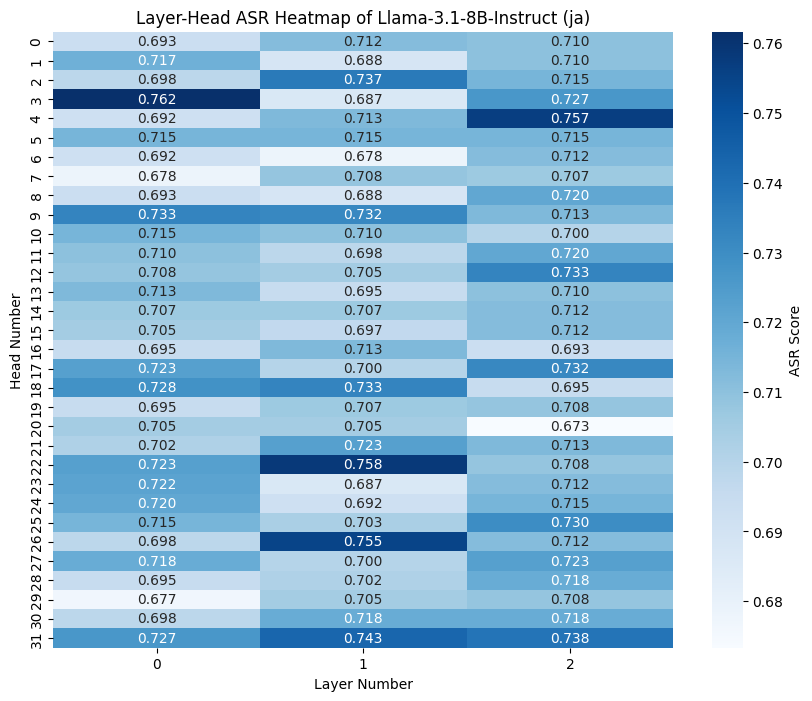

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def visualize_3layer(data,lang,annot):
    # データの整理
    layers = max(int(k.split('-')[0]) for k in data.keys()) + 1
    heads = max(int(k.split('-')[1]) for k in data.keys()) + 1
    heatmap_data = np.zeros((heads, layers))

    for k, v in data.items():
        layer, head = map(int, k.split('-'))
        heatmap_data[head, layer] = v

    # ヒートマップの描画
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, cmap="Blues", annot=annot, fmt=".3f", xticklabels=range(layers), yticklabels=range(heads),
                cbar_kws={'label': 'ASR Score'})

    plt.xlabel("Layer Number")
    plt.ylabel("Head Number")
    plt.title(f"Layer-Head ASR Heatmap of Llama-3.1-8B-Instruct ({lang})")
    plt.savefig(f"./Layer-Head ASR Heatmap of Llama-3.1-8B-Instruct ({lang}).png")
    plt.show()
data = {
    "0-0": 0.6933333333333334, "0-1": 0.7166666666666667, "0-2": 0.6983333333333333, "0-3": 0.7616666666666667,
    "0-4": 0.6916666666666667, "0-5": 0.7150000000000001, "0-6": 0.6916666666666667, "0-7": 0.6783333333333333,
    "0-8": 0.6933333333333334, "0-9": 0.7333333333333334, "0-10": 0.7150000000000001, "0-11": 0.71,
    "0-12": 0.7083333333333333, "0-13": 0.7133333333333334, "0-14": 0.7066666666666667, "0-15": 0.7050000000000001,
    "0-16": 0.6950000000000001, "0-17": 0.7233333333333334, "0-18": 0.7283333333333333, "0-19": 0.6950000000000001,
    "0-20": 0.7050000000000001, "0-21": 0.7016666666666667, "0-22": 0.7233333333333334, "0-23": 0.7216666666666667,
    "0-24": 0.72, "0-25": 0.7150000000000001, "0-26": 0.6983333333333333, "0-27": 0.7183333333333333,
    "0-28": 0.6950000000000001, "0-29": 0.6766666666666667, "0-30": 0.6983333333333333, "0-31": 0.7266666666666667,
    "1-0": 0.7116666666666667, "1-1": 0.6883333333333334, "1-2": 0.7366666666666667, "1-3": 0.6866666666666666,
    "1-4": 0.7133333333333334, "1-5": 0.7150000000000001, "1-6": 0.6783333333333333, "1-7": 0.7083333333333333,
    "1-8": 0.6883333333333334, "1-9": 0.7316666666666667, "1-10": 0.71, "1-11": 0.6983333333333333,
    "1-12": 0.7050000000000001, "1-13": 0.6950000000000001, "1-14": 0.7066666666666667, "1-15": 0.6966666666666667,
    "1-16": 0.7133333333333334, "1-17": 0.7, "1-18": 0.7333333333333334, "1-19": 0.7066666666666667,
    "1-20": 0.7050000000000001, "1-21": 0.7233333333333334, "1-22": 0.7583333333333333, "1-23": 0.6866666666666666,
    "1-24": 0.6916666666666667, "1-25": 0.7033333333333334, "1-26": 0.755, "1-27": 0.7, "1-28": 0.7016666666666667,
    "1-29": 0.7050000000000001, "1-30": 0.7183333333333333, "1-31": 0.7433333333333334, "2-0": 0.71, "2-1": 0.71,
    "2-2": 0.7150000000000001, "2-3": 0.7266666666666667, "2-4": 0.7566666666666666, "2-5": 0.7150000000000001,
    "2-6": 0.7116666666666667, "2-7": 0.7066666666666667, "2-8": 0.72, "2-9": 0.7133333333333334, "2-10": 0.7,
    "2-11": 0.72, "2-12": 0.7333333333333334, "2-13": 0.71, "2-14": 0.7116666666666667, "2-15": 0.7116666666666667,
    "2-16": 0.6933333333333334, "2-17": 0.7316666666666667, "2-18": 0.6950000000000001, "2-19": 0.7083333333333333,
    "2-20": 0.6733333333333333, "2-21": 0.7133333333333334, "2-22": 0.7083333333333333, "2-23": 0.7116666666666667,
    "2-24": 0.7150000000000001, "2-25": 0.73, "2-26": 0.7116666666666667, "2-27": 0.7233333333333334,
    "2-28": 0.7183333333333333, "2-29": 0.7083333333333333, "2-30": 0.7183333333333333, "2-31": 0.7383333333333333
}
visualize_3layer(data=data,lang="de",annot=False)
# 1, 0-3, 2 1-26, 3 1-22, 4 2-4
en={
  "0-0": 0.25,
  "0-1": 0.22999999999999998,
  "0-2": 0.2583333333333333,
  "0-3": 0.235,
  "0-4": 0.23333333333333328,
  "0-5": 0.255,
  "0-6": 0.31666666666666665,
  "0-7": 0.2483333333333333,
  "0-8": 0.26,
  "0-9": 0.2433333333333333,
  "0-10": 0.2483333333333333,
  "0-11": 0.2483333333333333,
  "0-12": 0.2633333333333333,
  "0-13": 0.2416666666666667,
  "0-14": 0.265,
  "0-15": 0.2533333333333333,
  "0-16": 0.265,
  "0-17": 0.21999999999999997,
  "0-18": 0.25,
  "0-19": 0.2316666666666667,
  "0-20": 0.2566666666666667,
  "0-21": 0.2483333333333333,
  "0-22": 0.235,
  "0-23": 0.255,
  "0-24": 0.23833333333333329,
  "0-25": 0.2583333333333333,
  "0-26": 0.24,
  "0-27": 0.22499999999999998,
  "0-28": 0.2533333333333333,
  "0-29": 0.29833333333333334,
  "0-30": 0.255,
  "0-31": 0.23333333333333328,
  "1-0": 0.2466666666666667,
  "1-1": 0.245,
  "1-2": 0.2533333333333333,
  "1-3": 0.25,
  "1-4": 0.21999999999999997,
  "1-5": 0.245,
  "1-6": 0.2433333333333333,
  "1-7": 0.2533333333333333,
  "1-8": 0.2483333333333333,
  "1-9": 0.2533333333333333,
  "1-10": 0.255,
  "1-11": 0.24,
  "1-12": 0.24,
  "1-13": 0.22333333333333338,
  "1-14": 0.24,
  "1-15": 0.2483333333333333,
  "1-16": 0.2566666666666667,
  "1-17": 0.21333333333333337,
  "1-18": 0.23833333333333329,
  "1-19": 0.2416666666666667,
  "1-20": 0.22499999999999998,
  "1-21": 0.25,
  "1-22": 0.22999999999999998,
  "1-23": 0.2633333333333333,
  "1-24": 0.2433333333333333,
  "1-25": 0.235,
  "1-26": 0.2433333333333333,
  "1-27": 0.245,
  "1-28": 0.2633333333333333,
  "1-29": 0.245,
  "1-30": 0.2416666666666667,
  "1-31": 0.235,
  "2-0": 0.24,
  "2-1": 0.27,
  "2-2": 0.24,
  "2-3": 0.2283333333333334,
  "2-4": 0.2366666666666667,
  "2-5": 0.2366666666666667,
  "2-6": 0.23833333333333329,
  "2-7": 0.2483333333333333,
  "2-8": 0.2533333333333333,
  "2-9": 0.235,
  "2-10": 0.235,
  "2-11": 0.2416666666666667,
  "2-12": 0.2466666666666667,
  "2-13": 0.25,
  "2-14": 0.255,
  "2-15": 0.21999999999999997,
  "2-16": 0.23333333333333328,
  "2-17": 0.2283333333333334,
  "2-18": 0.2516666666666667,
  "2-19": 0.22166666666666668,
  "2-20": 0.2416666666666667,
  "2-21": 0.24,
  "2-22": 0.2516666666666667,
  "2-23": 0.2533333333333333,
  "2-24": 0.245,
  "2-25": 0.23833333333333329,
  "2-26": 0.2416666666666667,
  "2-27": 0.23333333333333328,
  "2-28": 0.2533333333333333,
  "2-29": 0.2566666666666667,
  "2-30": 0.2416666666666667,
  "2-31": 0.2516666666666667
}
visualize_3layer(data=en,lang="en",annot=True)
# 1, 0-3, 2 1-26, 3 1-22, 4 2-4
ja = {
  "0-0": 0.6666666666666667,
  "0-1": 0.6283333333333334,
  "0-2": 0.6716666666666666,
  "0-3": 0.6916666666666667,
  "0-4": 0.6716666666666666,
  "0-5": 0.69,
  "0-6": 0.73,
  "0-7": 0.6383333333333333,
  "0-8": 0.6966666666666667,
  "0-9": 0.6716666666666666,
  "0-10": 0.6716666666666666,
  "0-11": 0.6983333333333333,
  "0-12": 0.6833333333333333,
  "0-13": 0.6733333333333333,
  "0-14": 0.6566666666666667,
  "0-15": 0.6599999999999999,
  "0-16": 0.6733333333333333,
  "0-17": 0.6983333333333333,
  "0-18": 0.6616666666666666,
  "0-19": 0.6633333333333333,
  "0-20": 0.665,
  "0-21": 0.6933333333333334,
  "0-22": 0.685,
  "0-23": 0.6716666666666666,
  "0-24": 0.735,
  "0-25": 0.665,
  "0-26": 0.6683333333333333,
  "0-27": 0.71,
  "0-28": 0.6916666666666667,
  "0-29": 0.6683333333333333,
  "0-30": 0.6883333333333334,
  "0-31": 0.7183333333333333,
  "1-0": 0.6883333333333334,
  "1-1": 0.675,
  "1-2": 0.6783333333333333,
  "1-3": 0.655,
  "1-4": 0.6683333333333333,
  "1-5": 0.665,
  "1-6": 0.7033333333333334,
  "1-7": 0.665,
  "1-8": 0.6883333333333334,
  "1-9": 0.6766666666666667,
  "1-10": 0.69,
  "1-11": 0.6599999999999999,
  "1-12": 0.6683333333333333,
  "1-13": 0.6799999999999999,
  "1-14": 0.675,
  "1-15": 0.6766666666666667,
  "1-16": 0.6633333333333333,
  "1-17": 0.6616666666666666,
  "1-18": 0.7066666666666667,
  "1-19": 0.6583333333333333,
  "1-20": 0.6933333333333334,
  "1-21": 0.655,
  "1-22": 0.6666666666666667,
  "1-23": 0.685,
  "1-24": 0.6866666666666666,
  "1-25": 0.675,
  "1-26": 0.6816666666666666,
  "1-27": 0.6933333333333334,
  "1-28": 0.6916666666666667,
  "1-29": 0.6966666666666667,
  "1-30": 0.6933333333333334,
  "1-31": 0.6516666666666666,
  "2-0": 0.665,
  "2-1": 0.6666666666666667,
  "2-2": 0.6966666666666667,
  "2-3": 0.6916666666666667,
  "2-4": 0.6799999999999999,
  "2-5": 0.69,
  "2-6": 0.6799999999999999,
  "2-7": 0.685,
  "2-8": 0.675,
  "2-9": 0.69,
  "2-10": 0.6683333333333333,
  "2-11": 0.6533333333333333,
  "2-12": 0.6783333333333333,
  "2-13": 0.7016666666666667,
  "2-14": 0.6699999999999999,
  "2-15": 0.6566666666666667,
  "2-16": 0.6833333333333333,
  "2-17": 0.6316666666666666,
  "2-18": 0.6983333333333333,
  "2-19": 0.6683333333333333,
  "2-20": 0.6783333333333333,
  "2-21": 0.6683333333333333,
  "2-22": 0.6666666666666667,
  "2-23": 0.6633333333333333,
  "2-24": 0.6599999999999999,
  "2-25": 0.6783333333333333,
  "2-26": 0.6833333333333333,
  "2-27": 0.6666666666666667,
  "2-28": 0.6783333333333333,
  "2-29": 0.685,
  "2-30": 0.685,
  "2-31": 0.6616666666666666
}

visualize_3layer(data=ja,lang="ja",annot=True)
# 1, 0-3, 2 1-26, 3 1-22, 4 2-4